In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_read = pd.read_csv('PbPbPTB_residue',index_col=0)
    df_read.head()

Loading data from file


In [5]:
df_read

,residue,name,obs,tl_training_n
0,-1.674453,TL,dNch_deta[0 5],48
1,-0.964854,TL,dNch_deta[0 5],48
2,0.845839,TL,dNch_deta[0 5],48
3,-0.166840,TL,dNch_deta[0 5],48
4,0.393462,TL,dNch_deta[0 5],48
...,...,...,...,...
19395,2.305903,GP,v22[60 70],485
19396,-7.631421,GP,v22[60 70],485
19397,4.368375,GP,v22[60 70],485
19398,-5.120852,GP,v22[60 70],485


In [4]:
#sns.set_context("notebook")

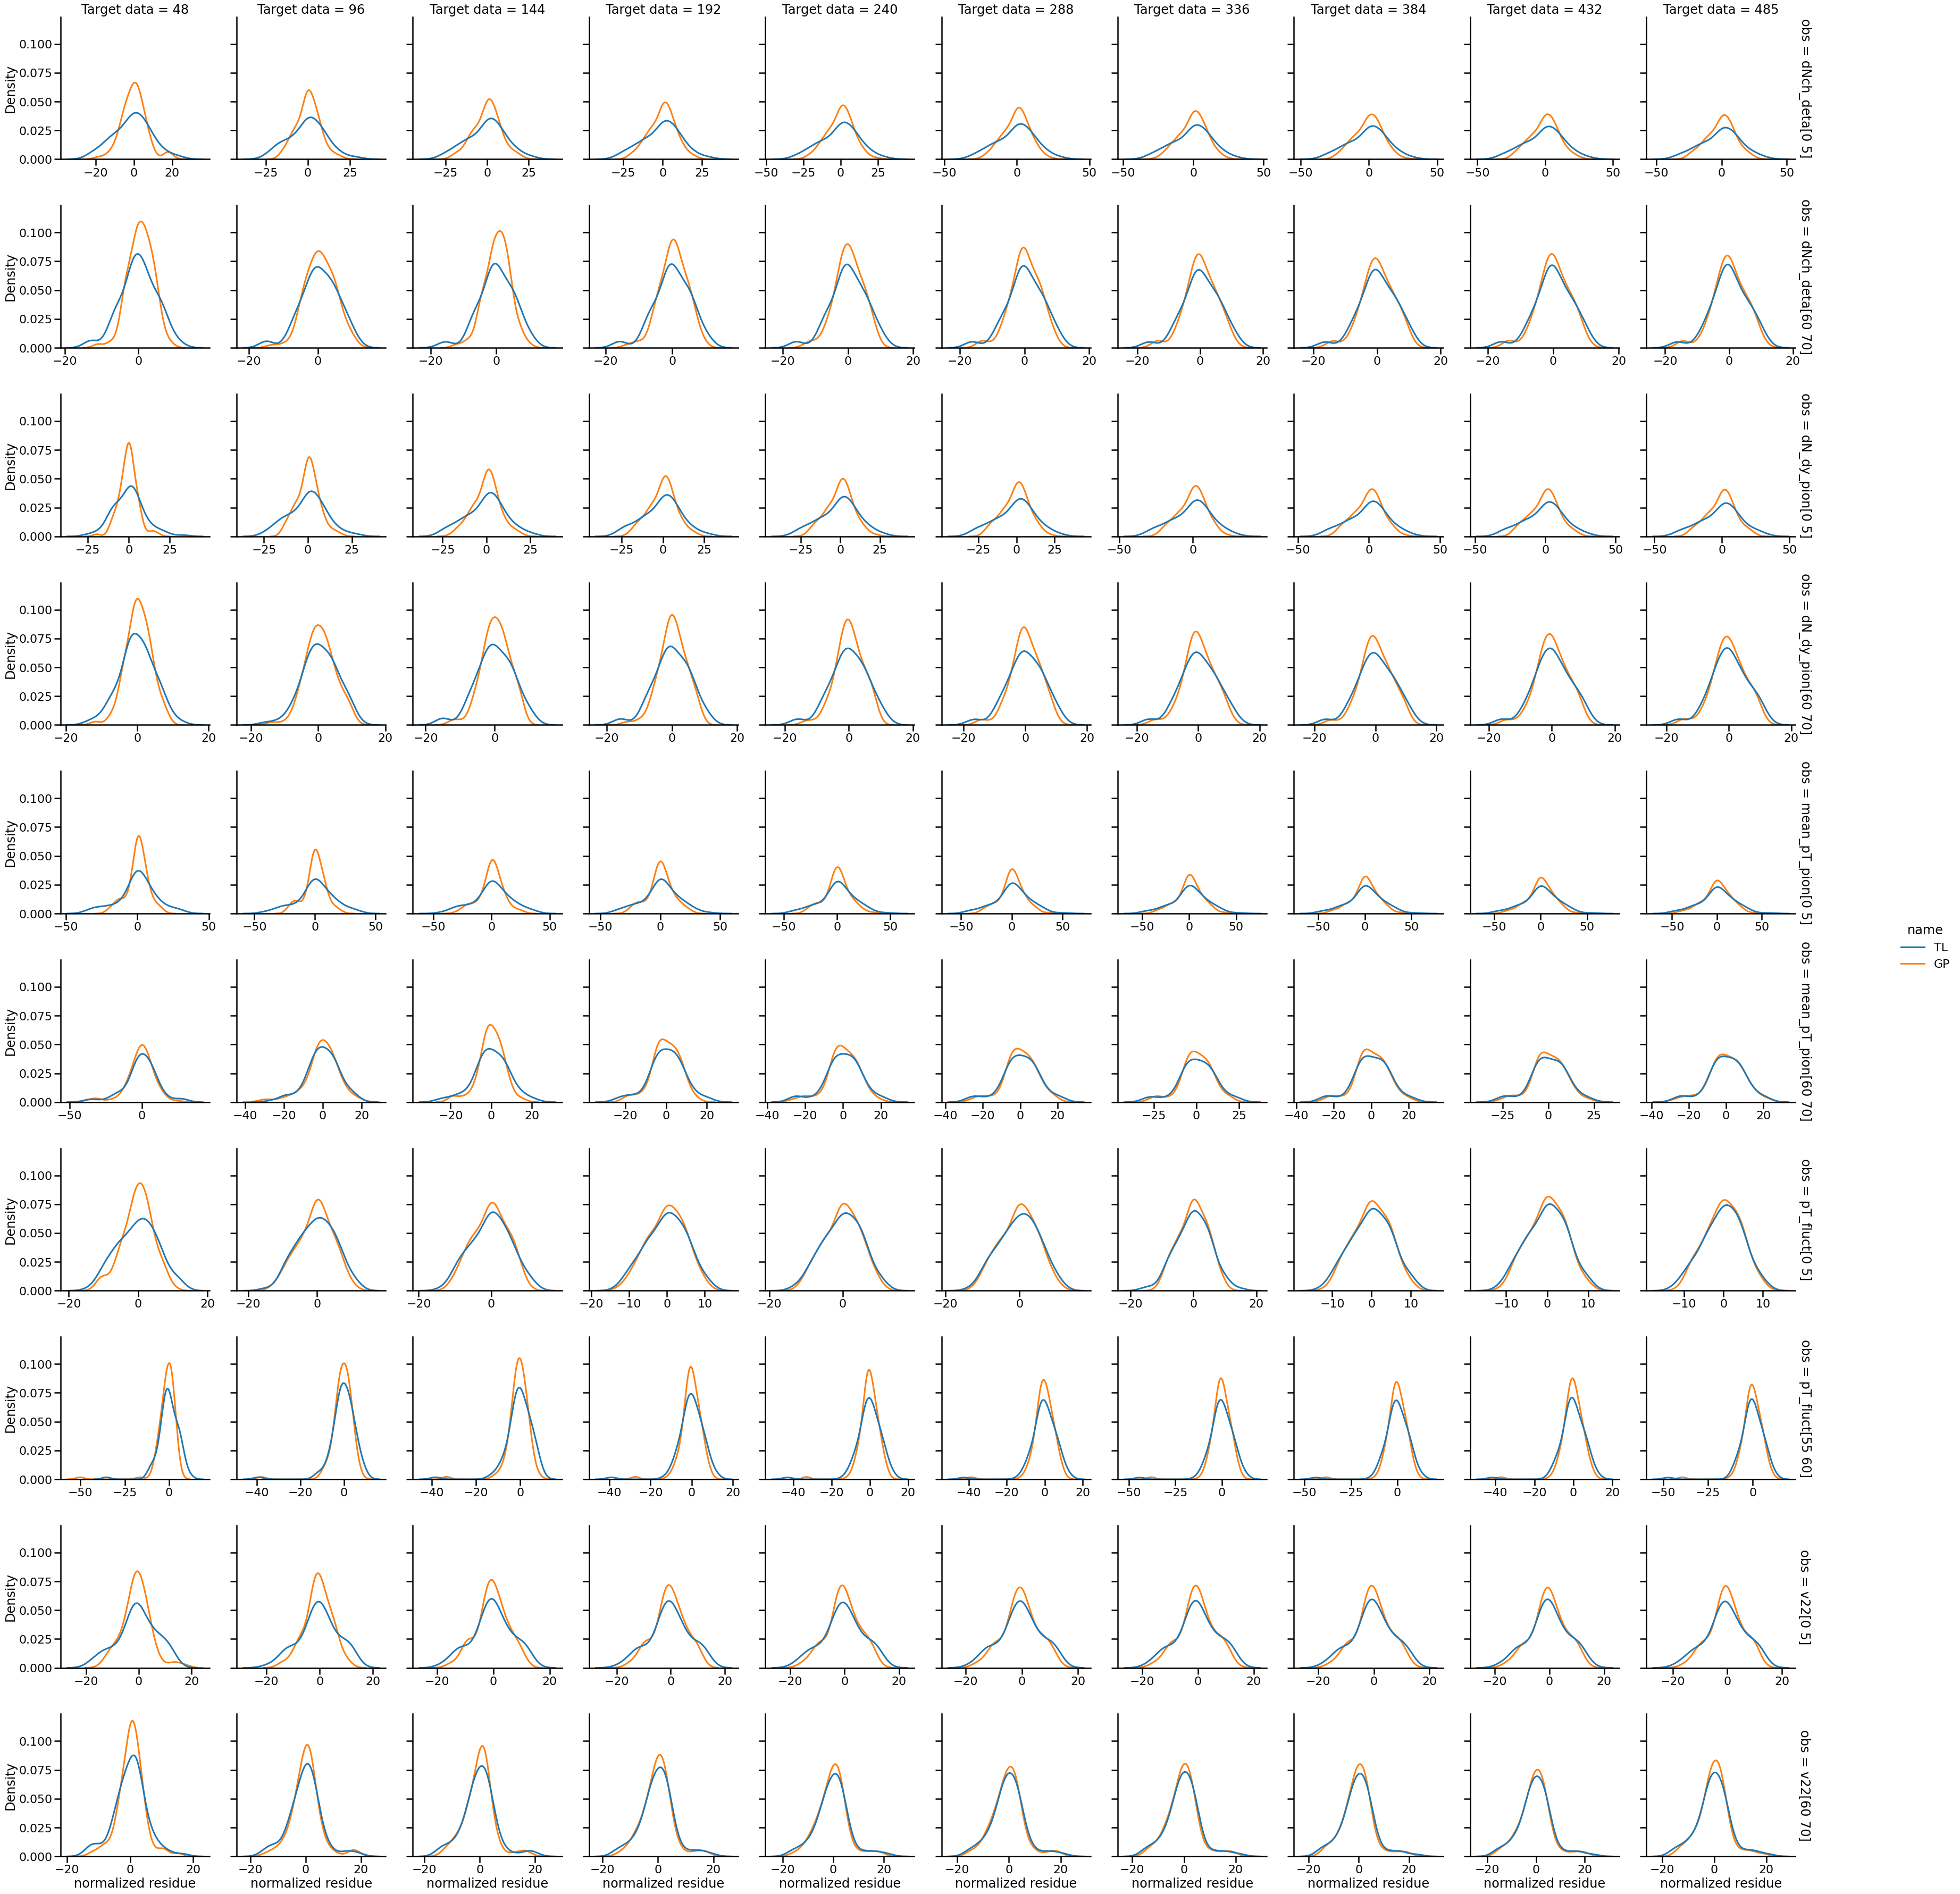

In [6]:
sns.set_context("poster")
df_read.rename(columns={'tl_training_n':'Target data','residue':'normalized residue'}, inplace=True)
plot2= sns.displot(df_read, kind="kde", x="normalized residue", col='Target data', row="obs", hue="name",
                  common_norm=False, facet_kws=dict(margin_titles=True,sharex=False))
#plot2.set(xlabel='normalized residue')
#axes = plot2.axes.flatten()
#for ax in axes:
#    ax.set_title("Training points from target")

#plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')





In [7]:
axes = plot2.fig.axes
from scipy import stats                                                         
xx = np.arange(-4, +4, 0.001)                                                   
yy = stats.norm.pdf(xx)                                                         


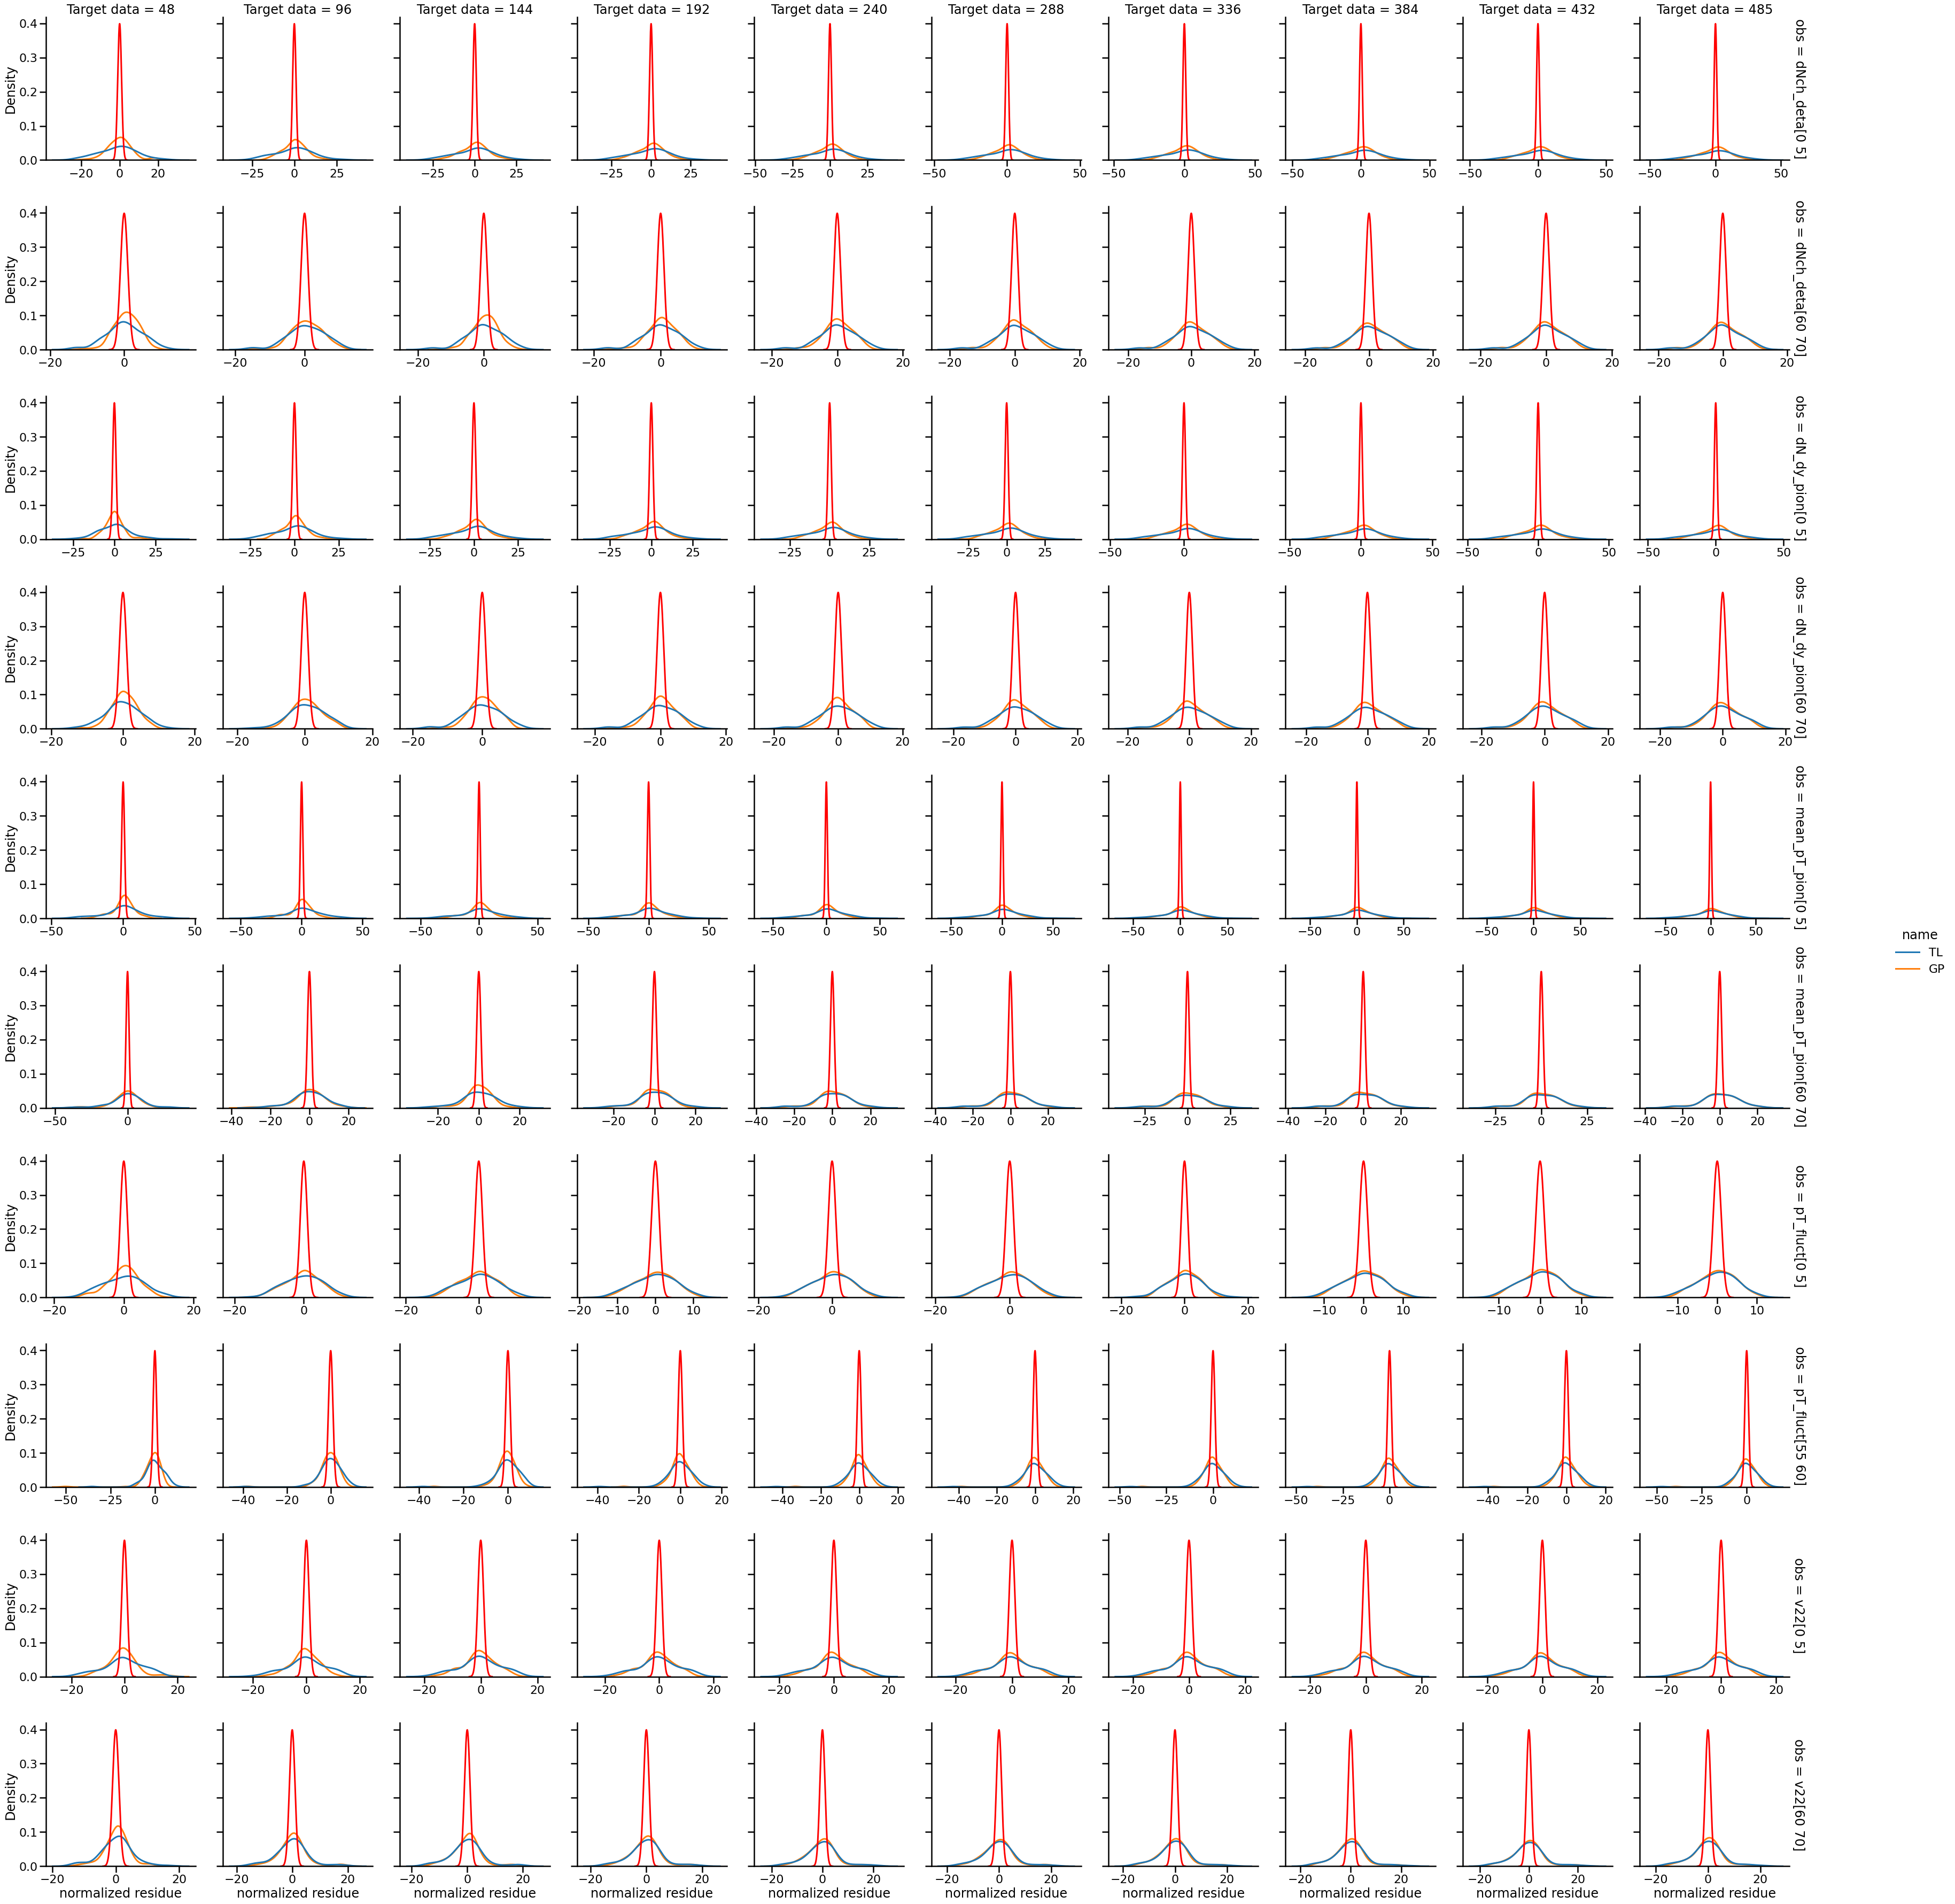

In [8]:
for i, ax in enumerate(axes):
    sns.lineplot(ax=ax,x=xx, y=yy, label="Standard Normal dist", legend=False, color='red')
plot2.savefig("PbPbPTB_new_vl__norm_residue.png", dpi=100)
plot2.fig
#plt.legend(loc='upper left', labels=['TL', 'GP','Normal'])

In [9]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_res = pd.read_csv("PbPbPTB",index_col=0)
df_res.head()

Loading data from file


,observable,fold,n_training,r2_lin_tl,r2_stand_GP,mse_lin_tl,mse_stand_GP,wn_lin_tl,wn_stand_GP,rho,mse_lin_mf,r2_lin_mf,wn_lin_mf_0,wn_lin_mf_1
0,dNch_deta[0 5],0,48,NaN,-1.104622,NaN,2.901858,NaN,5.562685e-309,1.242254,3.044076,-1.207768,0.006804,0.002031
1,dNch_deta[0 5],0,96,NaN,-1.010294,NaN,2.771798,NaN,5.114919e-03,1.066077,2.864110,-1.077244,0.006804,0.003800
2,dNch_deta[0 5],0,144,NaN,-1.071769,NaN,2.856561,NaN,6.688251e-03,1.071864,2.881789,-1.090066,0.006804,0.003367
3,dNch_deta[0 5],0,192,NaN,-1.010831,NaN,2.772539,NaN,7.095658e-03,1.039930,2.816598,-1.042786,0.006804,0.004399
4,dNch_deta[0 5],0,240,NaN,-1.011624,NaN,2.773633,NaN,7.491172e-03,1.060518,2.822540,-1.047095,0.006804,0.004678


In [10]:
df_gp_mse = df_res[['observable','fold','n_training','r2_stand_GP','mse_stand_GP']]
df_gp_mse['name'] = 'GP'
df_gp_mse.rename(columns={'r2_stand_GP':'R2','mse_stand_GP':'MSE'}, inplace=True)
df_gp_mse.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,48,-1.104622,2.901858,GP
1,dNch_deta[0 5],0,96,-1.010294,2.771798,GP
2,dNch_deta[0 5],0,144,-1.071769,2.856561,GP
3,dNch_deta[0 5],0,192,-1.010831,2.772539,GP
4,dNch_deta[0 5],0,240,-1.011624,2.773633,GP


In [11]:
df_tl_mse = df_res[['observable','fold','n_training','r2_lin_mf','mse_lin_mf']]
df_tl_mse['name'] = 'TL'
df_tl_mse.rename(columns={'r2_lin_mf':'R2','mse_lin_mf':'MSE'}, inplace=True)
df_tl_mse.head()

df_all = pd.concat([df_tl_mse,df_gp_mse],axis=0)

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_all.head()

,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,48,-1.207768,3.044076,TL
1,dNch_deta[0 5],0,96,-1.077244,2.864110,TL
2,dNch_deta[0 5],0,144,-1.090066,2.881789,TL
3,dNch_deta[0 5],0,192,-1.042786,2.816598,TL
4,dNch_deta[0 5],0,240,-1.047095,2.822540,TL


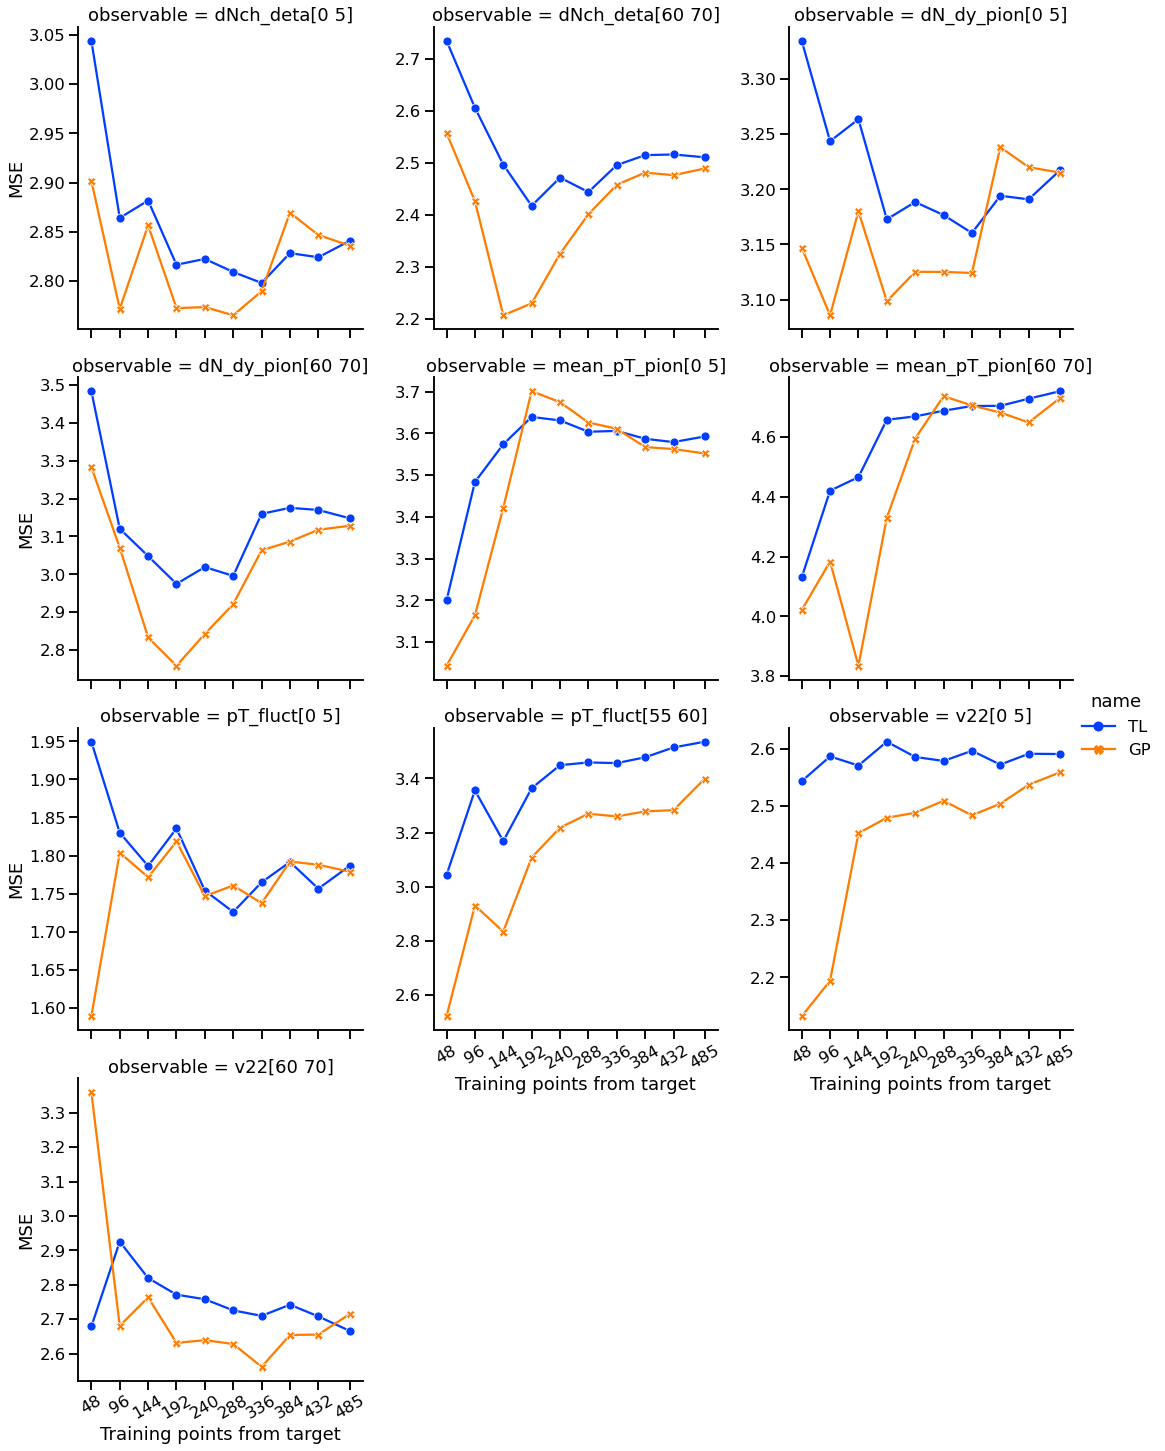

In [13]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",col="observable", kind='line', col_wrap=3,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
g.set_xticklabels(np.unique(df_all['n_training']),rotation=30)
g.savefig("AuAuGrad_all_observables_MSE.png", dpi=100)
#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

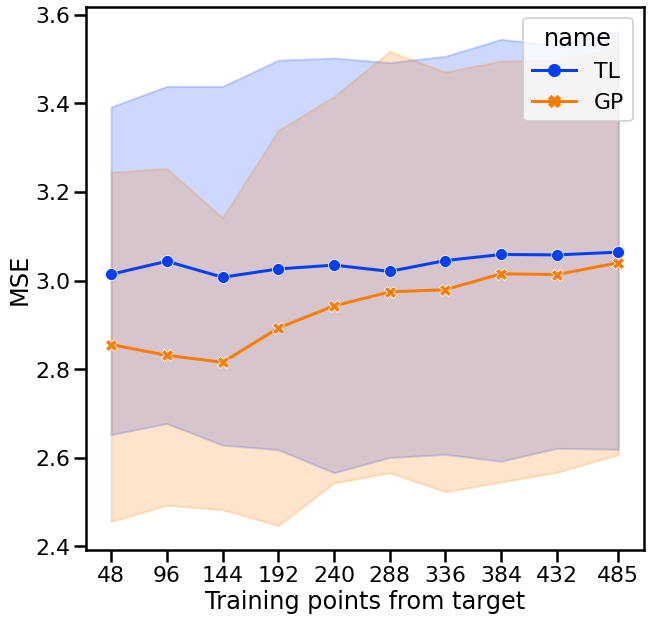

In [14]:
sns.set_context('poster')
line,ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False)
#ax.set_title('Averaged MSE')
ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
plt.savefig("AuAuGrad_averaged_MSE.png", dpi=100)


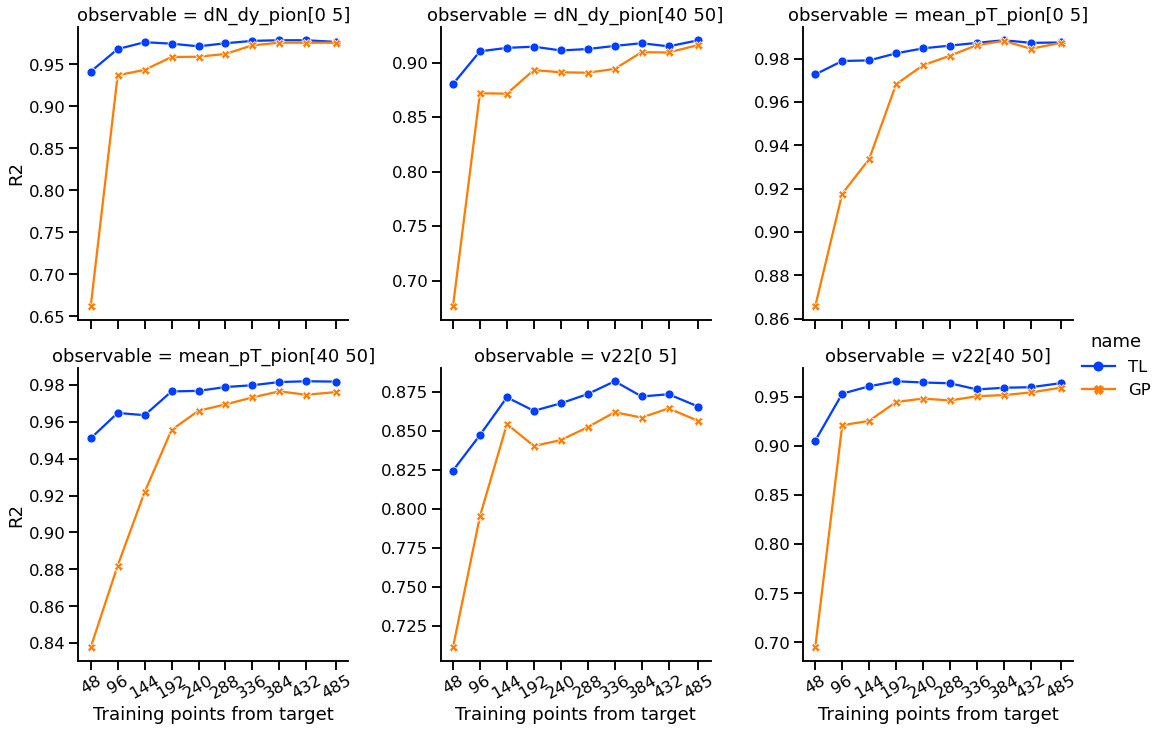

In [23]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue="name",style='name', col="observable", kind='line', col_wrap=3,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
g.set_xticklabels(np.unique(df_all['n_training']),rotation=30)
g.savefig("AuAuGrad_all_observables_R2.png", dpi=100)

#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

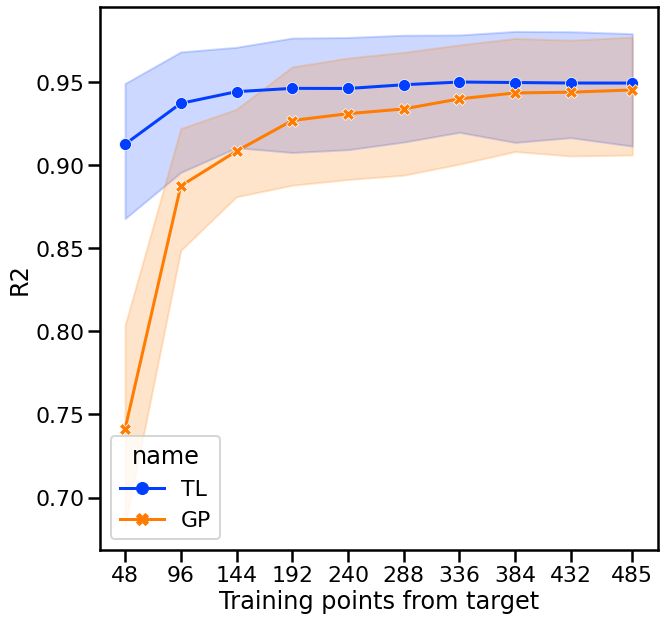

In [19]:
sns.set_context('poster')
line,ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False)
#ax.set_title('Averaged R2')
ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
plt.savefig("AuAuGrad_averaged_R2.png", dpi=100)
